In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
n_samples = 1000
mean = [5, 9]
cov = [[2.5, 0.8], [0.8, 0.5]]
X_p = np.random.multivariate_normal(mean, cov, n_samples).T
X_p.shape

(2, 1000)

In [3]:
mean = [11, 3]
cov = [[3, -1.3], [-1.3, 1.2]]
X_n_1 = np.random.multivariate_normal([11, 3], cov, int(n_samples/2)).T
X_n_2 = np.random.multivariate_normal([5, 2], cov, n_samples-int(n_samples/2)).T
X_n = np.hstack([X_n_1, X_n_2])
X_n.shape

(2, 1000)

In [4]:
XY_p = np.vstack([X_p, np.ones_like(X_p[0])])
XY_n = np.vstack([X_n, np.zeros_like(X_n[0])])
XY_n.shape

(3, 1000)

In [5]:
XY = np.hstack([XY_n, XY_p])
data_XY = np.copy(XY).T
np.random.shuffle(data_XY)
data_train = data_XY[:1600]
data_test = data_XY[:400]
data_train.shape

(1600, 3)

In [6]:
data_test

array([[12.77940847,  2.73332528,  0.        ],
       [10.46533629,  4.83533753,  0.        ],
       [ 3.9632519 ,  8.77608545,  1.        ],
       ...,
       [ 8.73667975,  4.65966592,  0.        ],
       [ 5.0871848 ,  9.69116458,  1.        ],
       [ 7.42984418,  9.65616161,  1.        ]])

## Plot Boundary

In [7]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def plot_boundary(X_n, X_p, params, ax=None):
    """
    Plots the boundary of a sigmoid threshold
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ylim_ub = np.ceil(np.maximum(np.max(X_n[1]), np.max(X_p[1])))
    ylim_lb = np.floor(np.minimum(np.min(X_n[1]), np.min(X_p[1])))
    ax.set_ylim(ylim_lb, ylim_ub)
    xlim_ub = np.ceil(np.maximum(np.max(X_n[0]), np.max(X_p[0])))
    xlim_lb = np.floor(np.minimum(np.min(X_n[0]), np.min(X_p[0])))
    ax.set_xlim(xlim_lb, xlim_ub)

    mesh_lb = np.minimum(xlim_lb, ylim_lb) - 1
    mesh_ub = np.maximum(xlim_ub, ylim_ub) + 1
    tt_x = np.arange(mesh_lb, mesh_ub, 0.1)
    tt_y = np.arange(mesh_lb, mesh_ub, 0.1)
    tt_xx, tt_yy = np.meshgrid(tt_x, tt_y, sparse=False, indexing='ij')
    tt_all = np.stack([tt_xx.flatten(), tt_yy.flatten()])
    tt_zz = sigmoid(np.dot(tt_all.T, params))

    plt.contourf(tt_x, tt_y, tt_zz.reshape(tt_xx.shape))

    ax.scatter(X_p[0], X_p[1], color="pink")
    ax.scatter(X_n[0], X_n[1], color="blue")

## Train

In [8]:
from shubov_algorithms import logistic_regression
model = logistic_regression.LogisticRegression(epochs=100)

In [9]:
loss = model.learn(data_train[:,:2],data_train[:,2])

/Users/shubov/Projects/UniPassau/ml/notebooks/shubov_algorithms/logistic_regression.py:34: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-weighted_features))


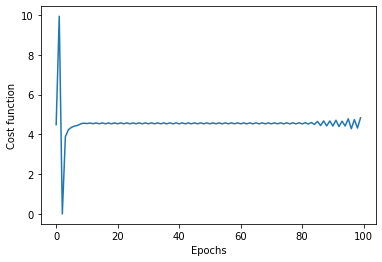

In [10]:
plt.ylabel('Cost function')
plt.xlabel('Epochs')
plt.plot(loss)

## Test

In [11]:
y_predict = model.infer(data_test[:,:2])

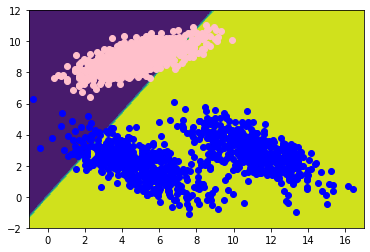

In [12]:
plot_boundary(X_n, X_p, model.weights)